Following the referee's comments, let's look at the [NIBLES](https://ui.adsabs.harvard.edu/abs/2016A%26A...595A.118V/abstract) HI data set. I'm using their Tables A1 & A2, which consists of ~1800 detections which also may have some overlap the ALFALFA and xGASS surveys.

In [1]:
from astropy.io import ascii
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

%matplotlib inline

PATH = Path('../..').resolve()

In [2]:
from astropy.coordinates import SkyCoord
import astropy.units as u

In [3]:
nibles = ascii.read(f'{PATH}/data/NIBLES_detections.txt')

In [4]:
len(nibles)

1864

In [5]:
nibles

Note,Source,Flag,RAh,RAm,RAs,DE-,DEd,DEm,DEs,Name,Vopt,e_Vopt,g-z,gMAG,log(M*),log(sSFR),rms,VHI,e_VHI,W50,W20,FHI,e_FHI,SNR,S/N,log(MHI),log(MHI/M*)
,,,h,min,s,,deg,arcmin,arcsec,--,km / s,km / s,mag,mag,[Msun],[1/yr],mJy,km / s,km / s,km / s,km / s,Jy km / s,Jy km / s,,,[Msun],
str1,int64,str7,int64,int64,float64,str1,int64,int64,float64,str23,int64,int64,float64,float64,float64,float64,float64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64
c,1,--,0,0,2.1,--,15,52,54.1,KUG 2357+156,6000,3,0.97,-19.39,9.74,-9.96,1.38,6009,7,214,232,0.67,0.19,3.4,5.4,9.06,-0.67
c,2,--,0,0,12.8,--,1,7,12.7,CGCG 382-016,7396,4,1.11,-20.2,10.18,-10.15,2.65,7397,21,233,308,2.5,0.42,5.0,10.0,9.82,-0.36
c,4,--,0,1,3.59,--,14,34,48.6,ASK 146570,1714,1,-0.18,-14.79,6.76,-8.37,1.57,1705,6,40,58,0.26,0.11,4.2,4.3,7.56,0.8
c,5,--,0,1,33.95,--,15,4,53.6,CGCG 433-016,6352,2,0.8,-19.61,9.57,-9.75,2.84,6365,17,117,193,1.75,0.36,6.1,9.3,9.53,-0.03
c,6,--,0,2,14.77,--,14,29,15.99,PGC 4567836,5131,10,0.72,-17.24,8.67,-9.77,2.37,5142,7,178,209,2.02,0.31,6.1,10.5,9.41,0.74
c,7,C3,0,3,11.3,--,15,57,56.5,IC 5381,11218,3,1.67,-21.62,11.31,-12.02,1.17,11228,7,700,729,2.55,0.28,5.7,13.2,10.19,-1.12
c,8,R,0,3,15.0,--,16,8,44.7,NGC 7814,1059,3,2.0,-19.1,--,--,2.18,1049,3,466,492,10.05,0.45,12.1,35.5,8.73,8.73
c,10,C2,0,3,32.1,-,10,44,40.7,NGC 7808,8865,2,1.46,-23.22,11.14,-11.57,3.33,8860,32,184,276,1.92,0.5,4.0,6.9,9.86,-1.27


In [6]:
nibles = nibles[np.isfinite(nibles['log(M*)'])]
len(nibles)

1621

In [7]:
nibles_pos = SkyCoord(
    [f'{RAh:>2d}:{RAm:>02d}:{RAs:>05.2f} {DEd:>3d}:{DEm:>02d}:{DEs:>05.2f}' for RAh,RAm,RAs,DEd,DEm,DEs in nibles[['RAh', 'RAm', 'RAs', 'DEd', 'DEm', 'DEs']]], 
    unit=(u.hourangle, u.deg)
)

Convert to dataframe

In [20]:
df = pd.DataFrame(
    dict(nibles_id=nibles['Source'],
         ra=nibles_pos.ra.deg,
         dec=nibles_pos.dec.deg,
         z=nibles['Vopt'] / 3e5,
         logMstar=nibles['log(M*)'],
         logMHI=nibles['log(MHI)'],
         logsSFR=nibles['log(sSFR)'],
         W50=nibles['W50'],
         peakSNR=nibles['SNR'],
         logfgas=nibles['log(MHI/M*)'],
    )
)


In [21]:
df.to_csv(f'{PATH}/data/NIBLES_data.csv', index=False)

# Compare log($M_{\rm HI}/M_{\rm star}$) distributions with other samples

In [22]:
a40 = pd.read_csv(f'{PATH}/data/a40.datafile1.csv').join(pd.read_csv(f'{PATH}/data/a40-SDSS_gas-frac.csv', index_col=1), how='left', on='AGCNr', lsuffix='_3')
a40.sample(3)

,AGCNr,Name,RAdeg_HI,Decdeg_HI,RAdeg_OC,DECdeg_OC,Vhelio,W50,errW50,HIflux,errflux,SNR,RMS,Dist,logMsun,HIcode,OCcode,NoteFlag,Unnamed: 0,logfgas
3036,188863,NaN,122.34208,8.58944,122.34666,8.57528,12215,173,11,1.05,0.08,7.1,2.52,178.0,9.89,1,I,*,1263.0,1.076032
4037,194771,NaN,140.10875,27.50667,140.10875,27.49833,8053,227,8,1.03,0.08,7.4,2.07,118.8,9.53,1,I,*,2179.0,0.257400
5598,202850,NaN,158.89207,12.64194,158.86957,12.64444,9226,271,7,1.25,0.09,7.6,2.22,136.7,9.74,1,I,*,3682.0,1.121359


In [23]:
xg = pd.read_csv(f'{PATH}/data/xGASS_representative_sample.csv', index_col=0)
xg.sample(3)

,AGCnr,SDSS,PLATEID,MJD,FIBERID,RA,DEC,zSDSS,Dlum,lgMstar,...,lgGF,HIconf_flag,weight,group_id_B,NYU_id,env_code_B,Ngal_B,yang_shred_code,logMh_Mst_B,lvir_ratB
GASS,,,,,,,,,,,,,,,,,,,,,
38729,240758,J145028.78+094750.0,1713,53827,162,222.61993,9.79723,0.04189,185.1,10.859,...,-1.139,0.0,0.426,268465,1259894,1,1,0,12.4556,-4.174682
11573,332752,J233011.60+132656.3,746,52238,129,352.54834,13.44898,0.03857,170.1,10.470,...,-1.791,0.0,0.712,-99,-99,-1,0,0,0.0000,-99.000000
17840,213070,J111254.48+093050.3,1222,52763,358,168.22700,9.51399,0.02907,127.3,10.189,...,-1.541,-99.0,0.564,5644,1059626,0,5,0,12.4155,-0.178401


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


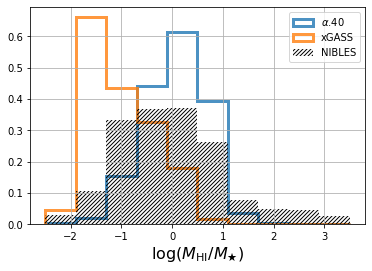

In [24]:

a40.logfgas.hist(alpha=0.8, density=1, range=[-2.5, 3.5], histtype='step', lw=3, label=r'$\alpha$.40')
xg.lgGF.hist(alpha=0.8, density=1, range=[-2.5, 3.5], histtype='step', lw=3, label='xGASS')
plt.hist(nibles['log(MHI/M*)'], alpha=0., density=1, range=[-2.5, 3.5], label='NIBLES', hatch='//////')

plt.xlabel(r'$\log(M_{\rm HI}/M_★)$', fontsize=16)
plt.legend()


Obviously we won't be able to predict the strongly out of distribution samples

## See distributions if we make $\log(M_{\star}/M_{\rm sun}) \geq 7.5$ cut 

In [25]:
nhi = nibles[nibles['log(M*)'] >= 7.5]

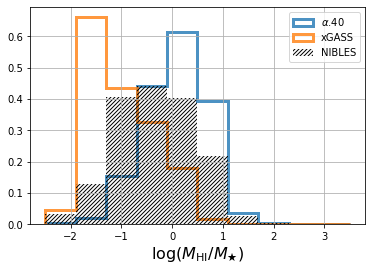

In [26]:
a40.logfgas.hist(alpha=0.8, density=1, range=[-2.5, 3.5], histtype='step', lw=3, label=r'$\alpha$.40')
xg.lgGF.hist(alpha=0.8, density=1, range=[-2.5, 3.5], histtype='step', lw=3, label='xGASS')
plt.hist(nhi['log(MHI/M*)'], alpha=0., density=1, range=[-2.5, 3.5], label='NIBLES', hatch='//////')

plt.xlabel(r'$\log(M_{\rm HI}/M_★)$', fontsize=16)
plt.legend()


Note these aren't saved

## Remove overlapping sources

Note that NIBLES HI masses are 45% lower than ALFALFA (Driel+16 section 4.6) and that they crossmatch NIBLES detections with SNR > 12 and W_50 agreement (only 82 sources). Our selection is generally more broad but we might expect a similar offset, given their attribution of the discrepancy to flux calibration.

In [27]:
a40_coords = SkyCoord(a40.RAdeg_OC, a40.DECdeg_OC, unit=u.deg)
xg_coords = SkyCoord(xg.RA, xg.DEC, unit=u.deg)

In [28]:
cutoff = 5 / 3600 # deg
idx_a40, idx_nibles_a, _, _ = nibles_pos.search_around_sky(a40_coords, cutoff*u.deg)
idx_xg, idx_nibles_b, _, _ = nibles_pos.search_around_sky(xg_coords, cutoff*u.deg)

In [29]:
idx_nibles = list(set(list(idx_nibles_a) + list(idx_nibles_b)))
len(idx_nibles)

323

In [30]:
nibles_clean = np.delete(nibles, idx_nibles)
nibles_pos_clean = SkyCoord(np.delete(nibles_pos, idx_nibles))

In [31]:
df_clean = pd.DataFrame(
    dict(nibles_id=nibles_clean['Source'],
         ra=nibles_pos_clean.ra.deg,
         dec=nibles_pos_clean.dec.deg,
         z=nibles_clean['Vopt'] / 3e5,
         logMstar=nibles_clean['log(M*)'],
         logMHI=nibles_clean['log(MHI)'],
         logsSFR=nibles_clean['log(sSFR)'],
         W50=nibles_clean['W50'],
         peakSNR=nibles_clean['SNR'],
         logfgas=nibles_clean['log(MHI/M*)'],
    )
)


In [32]:
df.to_csv(f'{PATH}/data/NIBLES_clean.csv', index=False)

# TLDR; use NIBLES_clean to remove overlapping sources with ALFALFA and xGASS. 

# The mass range still needs to be trimmed to remove very low-mass galaxies.

# Finally, some of these lie outside the SDSS footprint.